## STEP-1 :Business Problem Understanding
- Previously,we explored is there a relationship between total advertising spend and sales? as well as predicting 
the total sales for some value of tatal spend

**What the is the ralationship between each advertising channel(TV,Radio,Newspaper)and sales?**

## Step-2: Data Understanding

**Load Data & Understand every variable**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


**Dataset Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


**Exploratory Data Analysis**

In [4]:
continuous = ['TV','radio','newspaper','sales']

In [5]:
df[continuous].describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


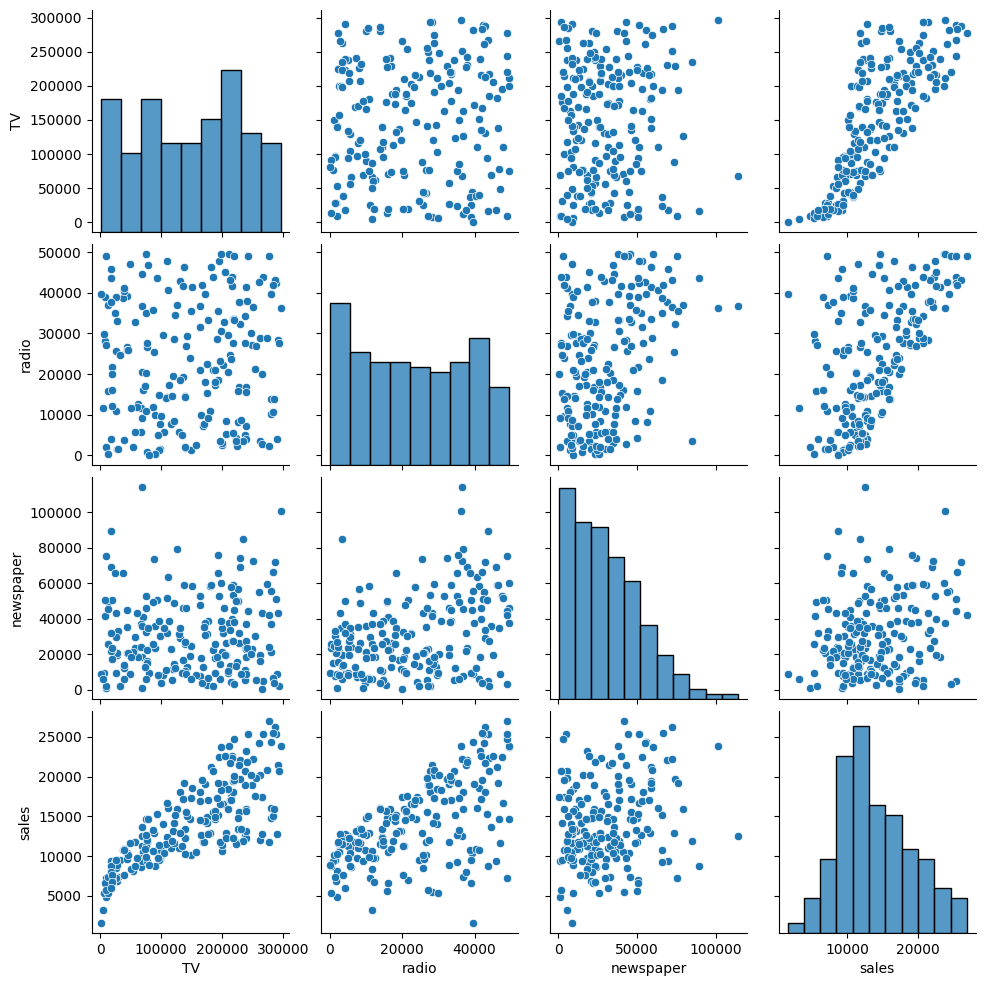

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df[continuous].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<Axes: >

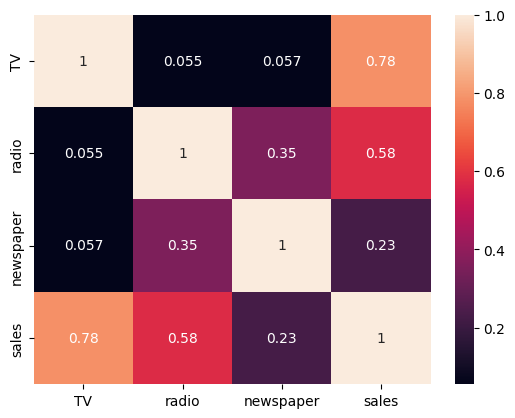

In [9]:
sns.heatmap(df[continuous].corr(),annot = True)

- The ralation between output variable and input variable should be high.
- The higher the value the stronger the correlation,better accuracy 
- if it has less correlation, it is a problem... less accuracy
- if any input variable has correlation less than 0.2 with output variable ,then that input variable should be dropped
- The ralation between any two independent variable should be low
- **if the correlation between any 2 independent variables is >=0.5,then it is called as colinearity problem**
- **solution:** drop 1 out of 2

**Input Variables == Independent Variables**
- Independent variables indicates ,they are independent each other ,which means ,there is no correlation 
between 2 independent variables
- if they have correlation ,then it known as **colinearity problem** 
- **Solution:** Drop 1 variable

**Variance Inflation Factor(VIF)**
- How much ,1 independent variable impact other independent variables
- VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model
versus the variance for a given regression coefficient with all variables in the model

In [10]:
# calculating VIF's values of independent variables
import statsmodels.formula.api as smf
rsq_TV =smf.ols('TV~radio+newspaper',data =df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols('radio ~ TV + newspaper',data = df).fit().rsquared
vif_radio = 1/(1-rsq_radio)

rsq_newspaper = smf.ols('newspaper ~ radio+TV',data = df).fit().rsquared
vif_newspaper = 1/(1-rsq_newspaper)

# storing vif values in a data frame
d1 ={'Variables':['TV','radio','newspaper'],'VIF':[vif_TV,vif_radio,vif_newspaper]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


**====>**
- 📌 Line 1:

- # calculating VIF's values of independent variables

- Comment line — This is just a note for readers (or yourself) to indicate that the following code is used to calculate the VIF values of independent variables. VIF helps detect multicollinearity among the predictors in a regression model.

📌 Line 2:

**import statsmodels.formula.api as smf**
                               
- This line imports the statsmodels.formula.api module and gives it a shorter name smf. This module lets you fit statistical models using formula-style syntax (like in R), such as 'Y ~ X1 + X2'.

- 📌 Line 3:

**rsq_TV = smf.ols('TV~radio+newspaper', data=df).fit().rsquared**

- This line does several things:

- Model creation:

**smf.ols('TV ~ radio + newspaper', data=df)**

- This creates a regression model where TV is the dependent variable, and radio and newspaper are the independent variables.

- Fitting the model:

- .fit()
- This fits the model to the data in df.

- Extracting R-squared:

**.rsquared**

- After fitting, .rsquared extracts the R² (coefficient of determination) value from the model.

- In essence, this line is calculating how well radio and newspaper explain the variance in TV.

- 📌 Line 4:

- vif_TV = 1/(1 - rsq_TV)
- This line calculates the Variance Inflation Factor (VIF) for the variable TV.
- The formula for VIF is:

- VIF=1/1−𝑅2
 
- Where:

- 𝑅2 is from regressing the target independent variable (in this case, TV) on the other independent variables (radio and newspaper).

- Higher VIF means more multicollinearity. Generally:

- VIF = 1 → No correlation with other variables.

- VIF > 5 or 10 → Indicates high multicollinearity (may need attention).

- Summary:
- You're checking how much TV is linearly related to the other predictors (radio, newspaper). If it is, it might not be a good idea to include all of them together due to multicollinearity

-  if the VIF > 4 (threshold value = 4).... then there exists a problem and reinvestigate the problem
- if VIF >4, for any independent variable,then drop that particular variable

## Step-3: Data Preprocessing

**Data cleaning**

In [11]:
# for this dataset ,no data cleaning required 

**Data Wrangling**

In [12]:
# for this dataset ,no data cleaning required

**X&Y**

In [13]:
x = df[['TV','radio','newspaper']]

y = df['sales']

**to identify the best random state number**

In [14]:
Train =[]
cv = []

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =i)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)

    ypred_train= model.predict(x_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())

em = pd.DataFrame({'Train':Train,'cv':cv})

gm = em[(abs(em['Train'] - em['cv'])<= 0.05)]
rs = gm[gm['cv'] == gm['cv'].max()].index.tolist()[0]
print('best random state number :',rs)

best random state number : 10


**📘 Code Explanation (Line by Line)**
- 🔹 Initialize empty lists

- Train = []

- cv = []
- These lists will store:

- Train: R² scores on training data

- cv: mean cross-validation scores for each random split

- 🔄 Run a loop for 100 different random states

**for i in range(0,100):**
              
- You're trying 100 different ways to split your data to see which split gives the most stable and generalizable model.

- 🧪 Split the data

**from sklearn.model_selection import train_test_split**
              
- x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

- For each random_state = i, you split your features (x) and target (y) into training (80%) and testing (20%) sets.

- Using different random states means the data is shuffled differently each time — changing how the split occurs.

- 📈 Train the Linear Regression model

**from sklearn.linear_model import LinearRegression**

- model = LinearRegression()                                                                                                        

- model.fit(x_train, y_train)
                                                                                
- This fits a Multiple Linear Regression model on the current training data.

- 🔮 Predict and evaluate on training data

- ypred_train = model.predict(x_train)

- from sklearn.metrics import r2_score

- Train.append(r2_score(y_train, ypred_train))

- You predict the output on the training set and calculate the R² score, storing it in the Train list.

- 🔁 Cross-validation score

- from sklearn.model_selection import cross_val_score
- cv.append(cross_val_score(model, x_train, y_train, cv=5).mean())
- You do 5-fold cross-validation on the same training data and store the average CV score in the cv list.

- Cross-validation is a better estimate of generalization error than just a train-test split.

- 📊 Creating a DataFrame of results

- em = pd.DataFrame({'Train': Train, 'cv': cv})

- This creates a DataFrame em with:

- Column 1: training R² scores

- Column 2: cross-validation scores

- ✅ Selecting best random state
- Filter 1: Small difference between Train and CV scores

- gm = em[(abs(em['Train'] - em['cv']) <= 0.05)]

- You're picking those random states where the model is not overfitting (train and CV scores are close).

- Filter 2: Best CV score among those

- rs = gm[gm['cv'] == gm['cv'].max()].index.tolist()[0]

- Among the filtered candidates, you select the index (random state) with the highest CV score. That’s your best random_state.

- 📌 Output

- print('best random state number :', rs)

- This prints the best random_state value to use for train-test splitting, based on your criteria.

- ❓ Why do we calculate random state number in Multiple Linear Regression?
Good question!

- In theory, linear regression should be deterministic, but:

- The data split (train/test) affects performance significantly.

- A bad random split might put too much useful data in the test set or unbalanced samples in train/test.

- To get a robust and repeatable model, we want to find a random_state that yields consistent and generalizable results.

- This technique is especially useful when:

- You have a small dataset

- You're tuning models for deployment or analysis

- You want to avoid bias due to one random train-test split



**Train-Test_Split**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10
                                            )

## Modelling

- 3 i/p columns

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print('Intercept',model.intercept_)
print('coefficient',model.coef_)

Intercept 3254.0971144188843
coefficient [ 0.0437726   0.19343299 -0.00222879]


## Evaluation

In [17]:
# Prediction on train data 
ypred_train = model.predict(x_train)

#Evaluation on train data 
from sklearn.metrics import r2_score
print('Train R2',r2_score(y_train,ypred_train))

# Cross Validation on train data 
from sklearn.model_selection import cross_val_score
print('Cross Validation Score',cross_val_score(model,x_train,y_train,cv = 5).mean())

#Prediction on test data 
ypred_test = model.predict(x_test)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Train R2 0.9209087553499528
Cross Validation Score 0.9157327701186169
Test R2: 0.8353672324670594



- 🧠 Goal of This Code
- You're:

 -Training a linear regression model

- Evaluating how well it fits the training data

- Checking generalization using cross-validation

- Evaluating the model's performance on unseen test data

- 🔹 1. Prediction on Training Data

- ypred_train = model.predict(x_train)

- You're using the trained model to predict values on the training set.

- 🔹 2. Evaluation on Training Data

- from sklearn.metrics import r2_score

- print('Train R2', r2_score(y_train, ypred_train))

- Here, you're calculating the R² score on the training data.

- This tells you how well the model fits the training data:

- R² = 1 → perfect fit

- R² = 0 → model predicts no better than mean

- R² < 0 → model is worse than using just the mean

- 🔹 3. Cross-Validation on Training Data

- from sklearn.model_selection import cross_val_score

- print('Cross Validation Score', cross_val_score(model, x_train, y_train, cv=5).mean())

- This is a very important step:

- You're splitting your training data into 5 folds.

- The model is trained on 4 folds and validated on the 5th, repeated 5 times.

- You take the mean of the 5 scores to get a more reliable measure of how the model might perform on unseen data.

- This guards against overfitting and gives a better generalization estimate than the training R² alone.

- 🔹 4. Prediction on Test Data

- ypred_test = model.predict(x_test)

- You're now predicting values on the test set (data the model has never seen).

- 🔹 5. Evaluation on Test Data

- from sklearn.metrics import r2_score

- print("Test R2:", r2_score(y_test, ypred_test))

- This is the final check — how well your model performs on real unseen data. A good model should have:

- Train R² ≈ CV Score ≈ Test R²

- If Test R² is much lower, the model is overfitting

- If Train R² is much lower, the model is underfitting

- ✅ Summary

- Metric	Purpose

- Train R²	Measures how well the model fits training data

- Cross Validation Score	Tests how well the model generalizes (on train data via folds)

- Test R²	Measures real-world performance on unseen data

In [18]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size = 0.8,random_state = 10)

import statsmodels.formula.api as smf
model1 = smf.ols('y_train ~ x_train',data =df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.09e-85
Time:                        01:08:03   Log-Likelihood:                -1381.9
No. Observations:                 160   AIC:                             2772.
Df Residuals:                     156   BIC:                             2784.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3254.0971    286.349     11.364      0.000    2688.475    3819.719
x_train[0]     0.0438      0.001     32.429      0.000       0.041       0.046
x_train[1]     0.1934      0.008     24.310      0.000       0.178       0.209
x_train[2]    -0.0022      0.005     -0.415      0.679      -0.013       0.008
==============================================================================
Omnibus:                       12.534   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.333
Skew:                          -0.697   Prob(JB):                      0.00127
Kurtosis:                       3.233   Cond. No.                     4.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- In above case,newspaper variable is not significieant(not important)

- Reason:p>0.05

- Meaning:regression is not fitted,instead of regression average model is best


- ✅ Code:

- from sklearn.model_selection import train_test_split

- df_train, df_test = train_test_split(df, train_size=0.8, random_state=10)

- 🔍 What it does:

- Splits your full DataFrame df into two parts:

- df_train: 80% of the data for training

- df_test: 20% of the data for testing

- random_state=10 ensures the split is reproducible. Every time you run this with random_state=10, you'll get the same train-test split.

- Use Case:

- This is important for training your model on one portion and testing on completely unseen data to evaluate generalization.

- ✅ Next:

- import statsmodels.formula.api as smf

- 🔍 What it does:

- Imports the formula API from statsmodels, which allows you to define regression models using R-style formulas like 'y ~ x1 + x2'.

- ❗ This line may contain an issue:

- model1 = smf.ols('y_train ~ x_train', data=df_train).fit()

- Let's break it down anyway:

- 🔍 What it's intended to do:

- smf.ols() is used to define an Ordinary Least Squares regression model.

- 'y_train ~ x_train' is the formula:

- y_train is the dependent (target) variable.

- x_train is the independent (predictor) variable.

- data=df_train tells the function to look for these columns in df_train.

- .fit() trains the model on the training data.

✅ Finally:

- model1.summary()

- 🔍 What it does:

- This prints a detailed regression summary, including:

- Coefficients of each feature

- p-values (to check significance)

- R-squared and Adjusted R-squared

- F-statistic and its significance

- Confidence Intervals

- Durbin-Watson statistic (for autocorrelation in residuals)

- This summary helps assess:

- Which variables significantly affect the target

- Whether your model is a good fit

- If multicollinearity or other issues exist

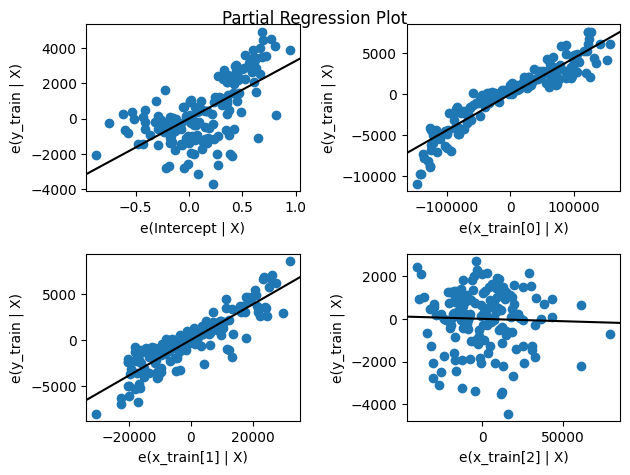

In [19]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()


- ✅ Code:

**import statsmodels.api as sm**

**sm.graphics.plot_partregress_grid(model1)**

- 🔍 What this code does — line by line:
- 🔹 1. import statsmodels.api as sm
- Imports the core API of statsmodels, which includes advanced tools for statistical modeling and plotting.

- You already used statsmodels.formula.api (smf) for building the model, but now you're using statsmodels.api (sm) for its visualization tools.

- 🔹 2. sm.graphics.plot_partregress_grid(model1)

- This function creates a grid of partial regression plots — one for each independent variable in your regression model.

- It uses the fitted model (model1) to generate the plots.

- 🧠 What is a Partial Regression Plot?
- Also known as:

- Added-variable plot

- Individual effect plot

- 📌 Definition:

- A partial regression plot shows the unique effect of one independent variable on the dependent variable after removing the linear effects of the other predictors.

- 📈 What it visualizes (for each independent variable):

- X-axis: Residuals from regressing the chosen predictor (say, TV) against all the other predictors (Radio, Newspaper, etc.)

- Y-axis: Residuals from regressing the dependent variable (Sales) on all other predictors (except the chosen one)

- Scatter plot: These residuals

- Line: A simple linear fit (regression line) through the scatter plot

- ✅ Why is it useful?

- Helps visualize the true relationship between the dependent variable and each independent variable.

- Identifies outliers or influential data points for each predictor.

- Lets you verify linearity assumptions visually.

- Provides insight into which variables actually contribute to the model, independent of the others.

- 🔍 Example Scenario:
- Let’s say your regression model is:

- Sales ~ TV + Radio + Newspaper

- When you use:

- sm.graphics.plot_partregress_grid(model1)

- It will generate three plots:

- One for TV

- One for Radio

- One for Newspaper

- Each plot answers:

- “After accounting for the effects of the other variables, how does this predictor relate to Sales?”

- 🖼️ Output: (What you’ll see)

- 3 subplots (if you have 3 predictors)

- Each subplot has:

- A scatter plot of partial residuals

- A best-fit line

- Optionally, a confidence interval or influence information

- 🚨 Tip:

- These plots are most useful after fitting a multiple regression model. They don’t make sense in simple linear regression (with only one independent variable), since there are no "other predictors" to partial out.

**check for influential Records**

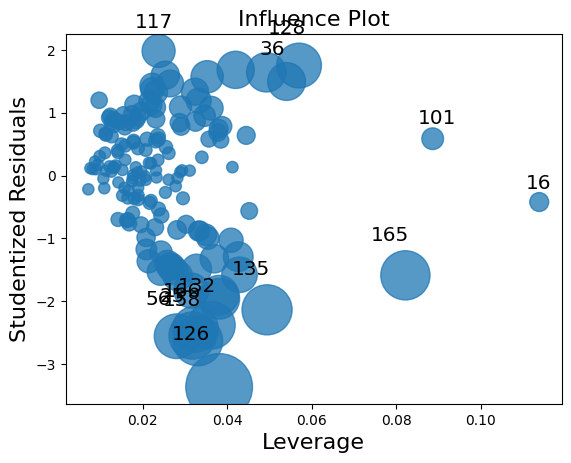

In [20]:
import statsmodels.api as sm

sm.graphics.influence_plot(model1)
plt.show()


- ✅ Code:

**sm.graphics.influence_plot(model1)**

- 🔍 What this line does:

- It generates an influence plot for your regression model (model1) using statsmodels.

- 🧠 What is an Influence Plot?
- An influence plot helps you identify:

- Outliers — observations with unusually high or low values

- Leverage points — observations that are far from the mean in terms of the predictor variables

- Influential points — observations that strongly affect the regression line, potentially distorting your model

- It visualizes the influence of each observation on the model fit.

- 📈 What the plot shows:

- The plot is a scatter plot with:

- Axis/Element	Meaning

- X-axis	Leverage (from the hat matrix) — how "far" the observation is in X space

- Y-axis	Studentized Residuals — standardized difference between actual and predicted

- Bubble size	Cook’s Distance — how much the regression coefficients would change if that point were removed

- 🔍 What to look for:

- Large X-value (high leverage): Point has extreme values of the predictors.

- Large Y-value (large residual): Model predicts poorly for this point.

- Big bubble (high Cook’s distance): Point has a big influence on the model — these are often the most concerning.

- ✅ Why we use influence_plot():
- Detect influential points:

- Some points can bias your model significantly, especially in small datasets.

- Identify outliers and leverage points:

- Helps assess model assumptions.

- Improve model robustness:

- You may decide to:

- Investigate those points

- Remove or transform them

- Rerun the model without them

- 📌 Typical next steps:

- If you find a point with:
                                                      
- High leverage

- Large residual

- Big Cook’s distance

- You can:

- Inspect the raw data

- Check for data entry errors

- Consider if the observation is truly representative

- Try fitting the model with and without that point

- 🧪 Example Use Case:

- You run:

- sm.graphics.influence_plot(model1)

- And you see:

- A point in the top-right corner with a huge bubble → This point both has high leverage and is poorly predicted and greatly influences the model. Might need investigation!

In [21]:
# drop the influentail Records
df.drop(index = [130,5,75,165,101,16,128,36],inplace = True)

x = df.drop(columns = ['sales'])
y = df['sales']

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
print('Intercept:',model.intercept_)
print('coefficient:',model.coef_)

ypred_train =  model.predict(x_train)
print('Train R2:',r2_score(y_train,ypred_train))
print('cross validation score:',cross_val_score(model,x_train,y_train,cv = 5).mean())

ypred_test = model.predict(x_test)
print('Test R2:',r2_score(y_test,ypred_test))

Intercept: 3187.802420142445
coefficient: [0.04231835 0.19018805 0.01162628]
Train R2: 0.9186337181540609
cross validation score: 0.9039524436092407
Test R2: 0.8901435248440224


In [22]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size = 0.8,random_state = 10)

import statsmodels.formula.api as smf
model2 = smf.ols('y_train ~ x_train',data = df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     560.7
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           6.32e-81
Time:                        01:08:04   Log-Likelihood:                -1330.4
No. Observations:                 153   AIC:                             2669.
Df Residuals:                     149   BIC:                             2681.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3187.8024    305.095     10.449      0.000    2584.932    3790.673
x_train[0]     0.0423      0.001     29.315      0.000       0.039       0.045
x_train[1]     0.1902      0.009     21.513      0.000       0.173       0.208
x_train[2]     0.0116      0.007      1.666      0.098      -0.002       0.025
==============================================================================
Omnibus:                       12.667   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.043
Skew:                          -0.742   Prob(JB):                     0.000893
Kurtosis:                       2.985   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# drop newspaper 
df.drop(columns = ['newspaper'],inplace = True)

x = df.drop(columns = ['sales'])
y = df['sales']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Intercept:',model.intercept_)
print('coefficients:',model.coef_)

ypred_train = model.predict(x_train)
print('Train R2:',r2_score(y_train,ypred_train))
print('cross Validation score:',cross_val_score(model,x_train,y_train,cv = 5).mean())

ypred_test = model.predict(x_test)
print('Test R2:',r2_score(y_test,ypred_test))

Intercept: 3357.7202283404695
coefficients: [0.04254012 0.19615138]
Train R2: 0.9171180924161672
cross Validation score: 0.9037797241797525
Test R2: 0.8971081979513411


In [25]:
from sklearn.model_selection import train_test_split
df_train ,df_test = train_test_split(df,test_size = 0.2,random_state = 10)

import statsmodels.formula.api as smf
model3 = smf.ols('y_train ~ x_train',data = df_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     829.9
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           7.66e-82
Time:                        01:13:10   Log-Likelihood:                -1331.8
No. Observations:                 153   AIC:                             2670.
Df Residuals:                     150   BIC:                             2679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3357.7202    289.238     11.609      0.000    2786.213    3929.227
x_train[0]     0.0425      0.001     29.422      0.000       0.040       0.045
x_train[1]     0.1962      0.008     24.123      0.000       0.180       0.212
==============================================================================
Omnibus:                       13.858   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.419
Skew:                          -0.776   Prob(JB):                     0.000449
Kurtosis:                       3.093   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final model including TV and Radio only

**Interpreting the coefficients**

- Holding all other features fixed ,a 1 unit incrases in TV spend is associated with an 
increase of 0.0425 units in sales.

- This basically means that for every $10000 dollars spend on TV Ads,we could expect 425 more units sold.

- Holding all other features fixed ,a 1 unit incrases in radio spend is associated with an 
increase of 0.1962 units in sales.

- This basically means that for every $10000 dollars spend on radio Ads,we could expect 1962 more units sold.